In [3]:
import msprime, tskit, pyslim, time 
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import os
from matplotlib import pyplot as plt

In [6]:
amplicon_intervals = [(2003, 3003), (10003003, 10004003), (20004003, 20005003)]

In [13]:
merged_df[(merged_df["Position"] >= 2003) & (merged_df["Position"] <= 3003)]

,Position,Diversity,Branch Length,Tajima's D,A,N,u,r,S
6,2003.0,2.112269,87226.0,1.178270,3.0,1000.0,0.000005,5.000000e-08,2.0
6,2003.0,2.707673,81755.0,1.711458,3.0,1000.0,0.000005,5.000000e-08,200.0
5,2003.0,2.350568,81172.0,1.438409,3.0,1000.0,0.000005,5.000000e-08,20.0
5,2003.0,2.299107,83609.0,1.539003,3.0,1000.0,0.000005,5.000000e-08,20.0
7,2003.0,2.362394,67218.0,1.851272,3.0,1000.0,0.000005,5.000000e-08,200.0
5,2003.0,1.911494,79888.0,1.782978,3.0,1000.0,0.000005,5.000000e-08,2.0
7,2003.0,2.154121,79233.0,0.779112,3.0,1000.0,0.000005,5.000000e-08,2.0
5,2003.0,2.334812,81121.0,1.042456,3.0,1000.0,0.000005,5.000000e-10,20.0
5,2003.0,2.166887,86179.0,1.124099,3.0,1000.0,0.000005,5.000000e-08,20.0
6,2003.0,2.972209,94566.0,1.361520,3.0,1000.0,0.000005,5.000000e-08,200.0


In [21]:
#Applying statistics only to one tree seq
df = pd.read_hdf("../steps/processed_tree_seqs/A_3__N_1000__u_0.0000050000__r_0.0000000005__S_2_1.h5")
df.replace([np.inf, -np.inf], np.nan, inplace=True) #Filtering non informing values
df = df.dropna()
df

,Position,Diversity,Branch Length,Tajima's D,A,N,u,r,S
1,0.0,0.000020,81191.0,-0.893303,3.0,1000.0,0.000005,5.000000e-10,2.0
4,1322.0,0.000715,71224.0,1.877028,3.0,1000.0,0.000005,5.000000e-10,2.0
6,2003.0,0.000345,73697.0,1.866777,3.0,1000.0,0.000005,5.000000e-10,2.0
7,189977.0,0.000187,73787.0,1.688711,3.0,1000.0,0.000005,5.000000e-10,2.0
8,662305.0,0.000145,73984.0,1.308041,3.0,1000.0,0.000005,5.000000e-10,2.0
...,...,...,...,...,...,...,...,...,...
60,28177924.0,0.000209,70440.0,2.174065,3.0,1000.0,0.000005,5.000000e-10,2.0
61,28574146.0,0.000229,70466.0,2.720987,3.0,1000.0,0.000005,5.000000e-10,2.0
62,28683598.0,0.000215,70489.0,2.122210,3.0,1000.0,0.000005,5.000000e-10,2.0
63,29041921.0,0.000183,71403.0,1.722313,3.0,1000.0,0.000005,5.000000e-10,2.0


In [22]:
df[(df["Position"] >= 2003) & (df["Position"] <= 3003)]

,Position,Diversity,Branch Length,Tajima's D,A,N,u,r,S
6,2003.0,0.000345,73697.0,1.866777,3.0,1000.0,0.000005,5.000000e-10,2.0


In [25]:
df[(df["Position"] <= 10003003)] #& (df["Position"] <= 10004003)]

,Position,Diversity,Branch Length,Tajima's D,A,N,u,r,S
1,0.0,0.000020,81191.0,-0.893303,3.0,1000.0,0.000005,5.000000e-10,2.0
4,1322.0,0.000715,71224.0,1.877028,3.0,1000.0,0.000005,5.000000e-10,2.0
6,2003.0,0.000345,73697.0,1.866777,3.0,1000.0,0.000005,5.000000e-10,2.0
7,189977.0,0.000187,73787.0,1.688711,3.0,1000.0,0.000005,5.000000e-10,2.0
8,662305.0,0.000145,73984.0,1.308041,3.0,1000.0,0.000005,5.000000e-10,2.0
9,718588.0,0.000231,73756.0,2.119224,3.0,1000.0,0.000005,5.000000e-10,2.0
10,899186.0,0.000167,74482.0,1.557556,3.0,1000.0,0.000005,5.000000e-10,2.0
11,1046692.0,0.000221,74825.0,1.758521,3.0,1000.0,0.000005,5.000000e-10,2.0
12,1317387.0,0.000213,74895.0,1.972747,3.0,1000.0,0.000005,5.000000e-10,2.0
13,1790748.0,0.000183,74703.0,1.981027,3.0,1000.0,0.000005,5.000000e-10,2.0


In [42]:
df["Position"].iloc[2]

2003.0

In [57]:
amplicon_intervals = [(2003, 3003), (10003003, 10004003), (20004003, 20005003)] #(start, end) of amplicon genomic position intervals
amplicon_average_positions = [(sum(e) // 2) for e in amplicon_intervals] #average of amplicon positions

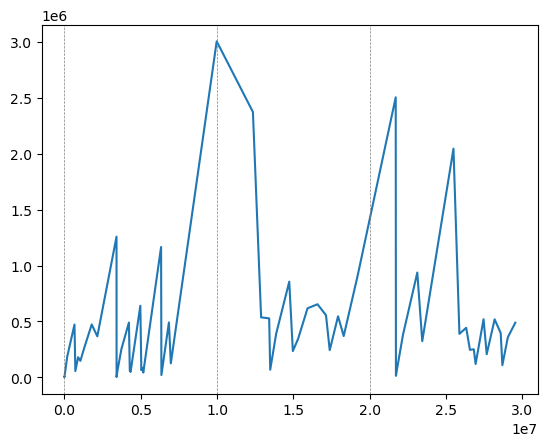

In [58]:
x = np.array(df["Position"][1:])
#ranges of tree sequence span in the chromosome position
y = np.array([n - df["Position"].iloc[i - 1] for i, n in enumerate(df["Position"]) if i != 0])
plt.plot(x, y)
for vline in amplicon_average_positions:
                plt.axvline(x = vline, color='grey', linestyle='--', lw = 0.5)
plt.show()

r    5.000000e-08
S    2.000000e+00
Name: 1, dtype: float64


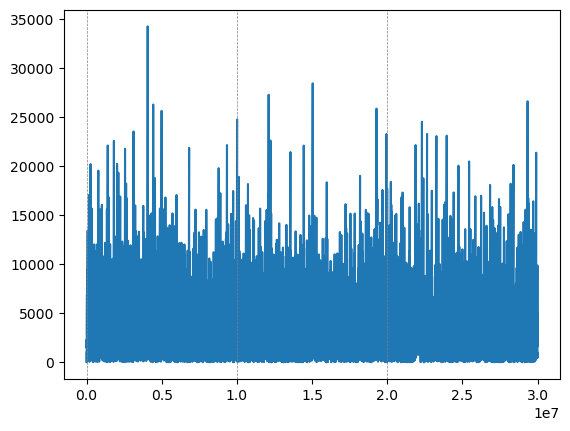

r    5.000000e-08
S    2.000000e+02
Name: 1, dtype: float64


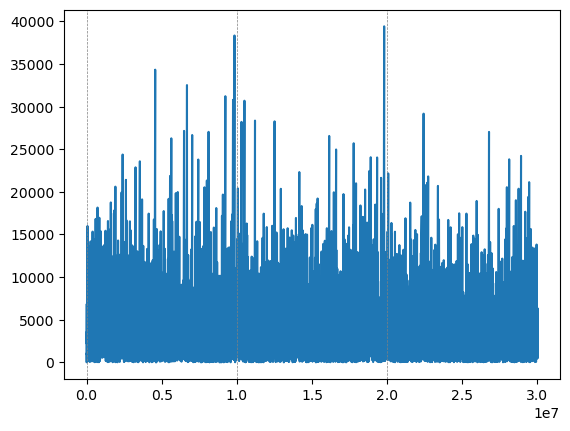

r    5.000000e-08
S    2.000000e+01
Name: 1, dtype: float64


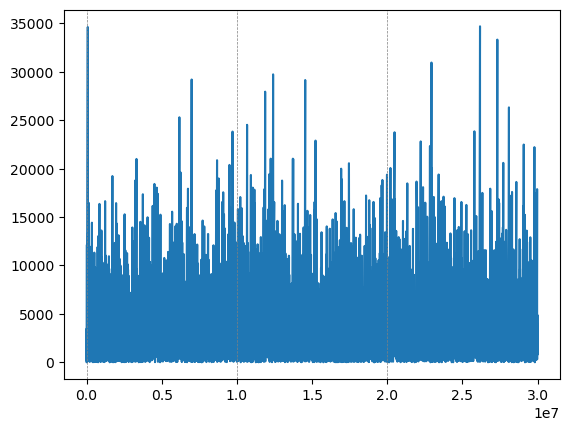

r    5.000000e-08
S    2.000000e+01
Name: 1, dtype: float64


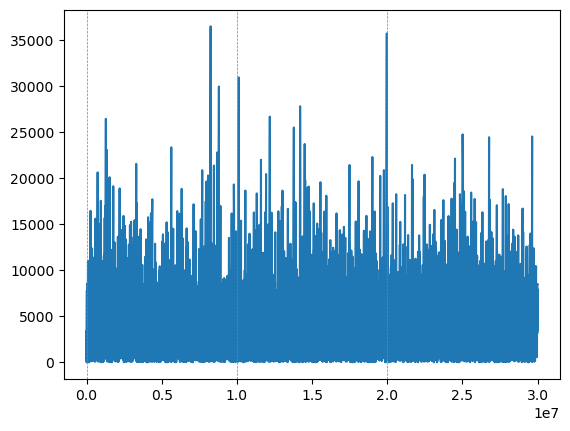

r    5.000000e-08
S    2.000000e+02
Name: 1, dtype: float64


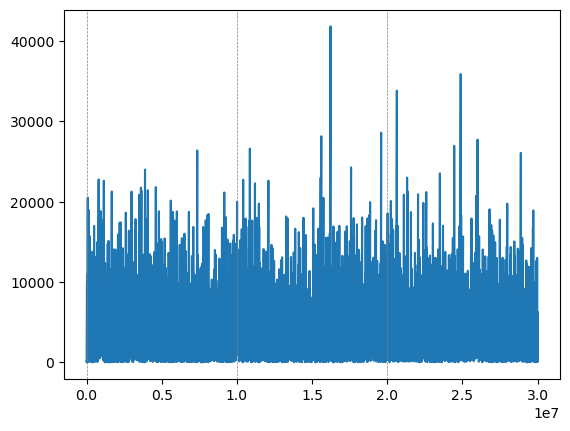

r    5.000000e-08
S    2.000000e+00
Name: 1, dtype: float64


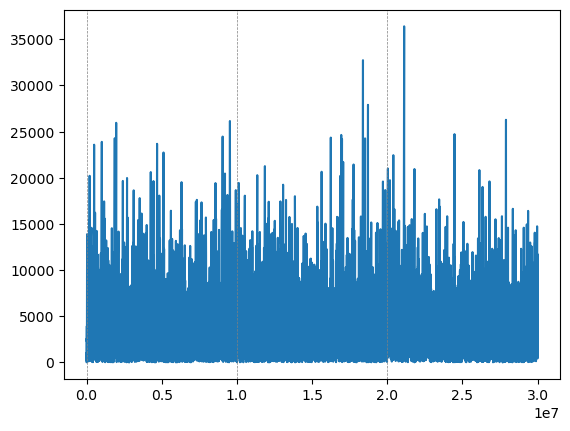

r    5.000000e-08
S    2.000000e+00
Name: 1, dtype: float64


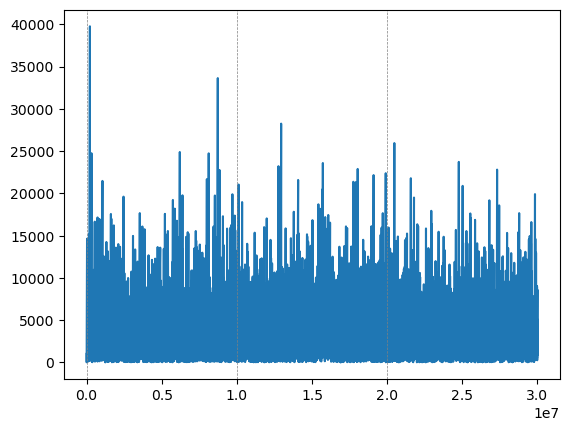

r    5.000000e-10
S    2.000000e+01
Name: 1, dtype: float64


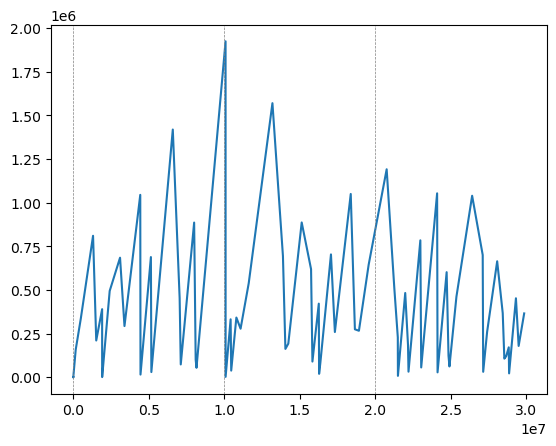

r    5.000000e-08
S    2.000000e+01
Name: 1, dtype: float64


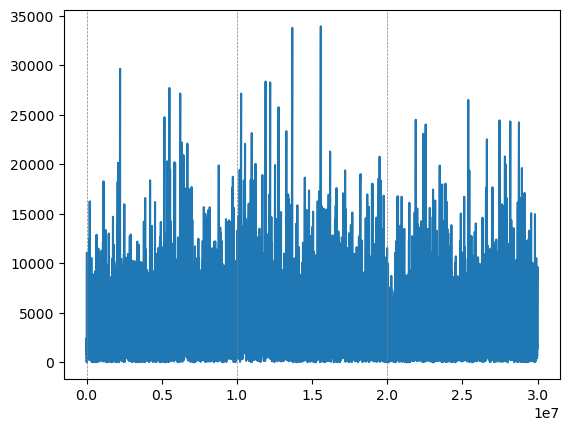

r    5.000000e-08
S    2.000000e+02
Name: 1, dtype: float64


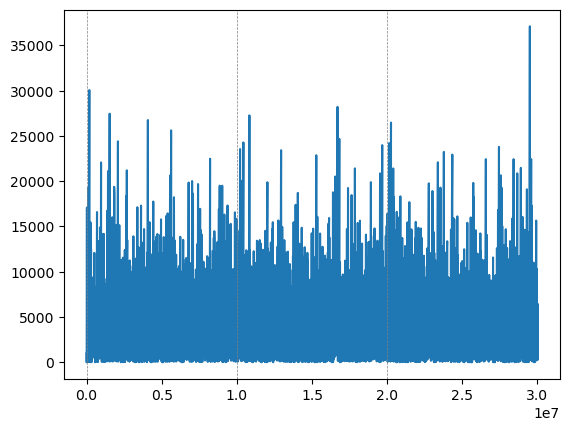

r    5.000000e-08
S    2.000000e+02
Name: 1, dtype: float64


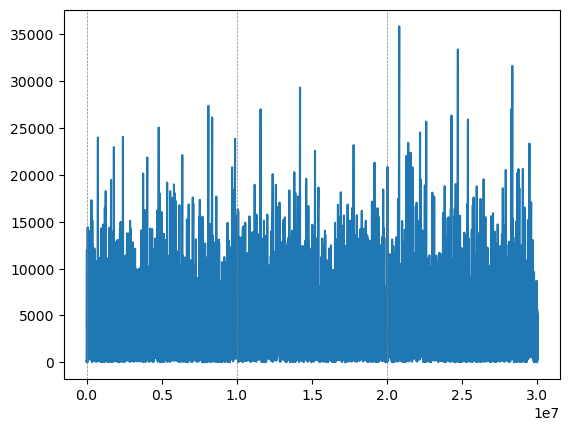

r    5.000000e-08
S    2.000000e+01
Name: 1, dtype: float64


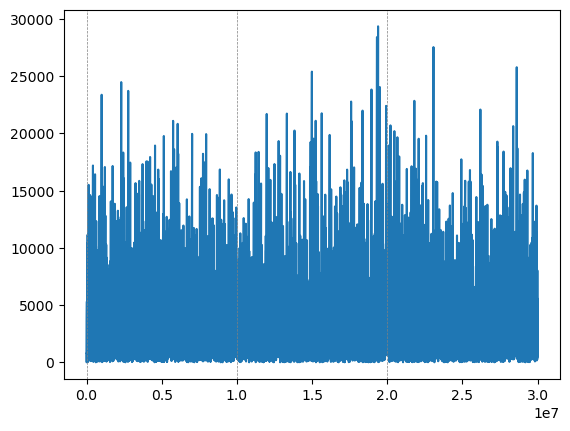

r    5.000000e-08
S    2.000000e+00
Name: 1, dtype: float64


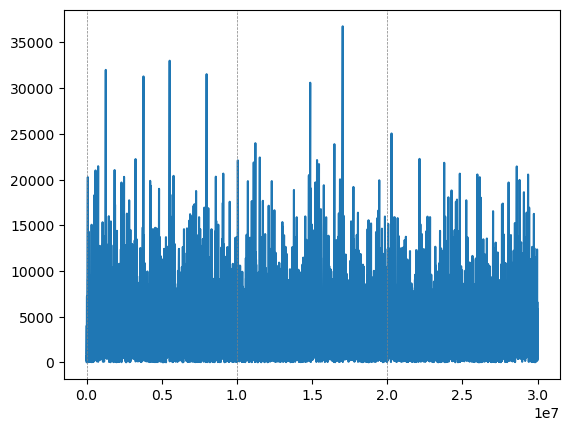

r    5.000000e-10
S    2.000000e+01
Name: 1, dtype: float64


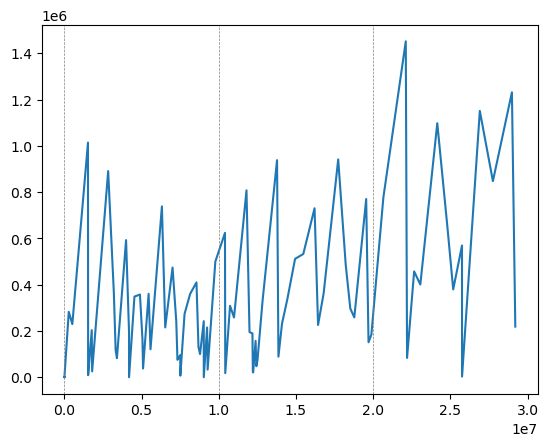

r    5.000000e-10
S    2.000000e+01
Name: 1, dtype: float64


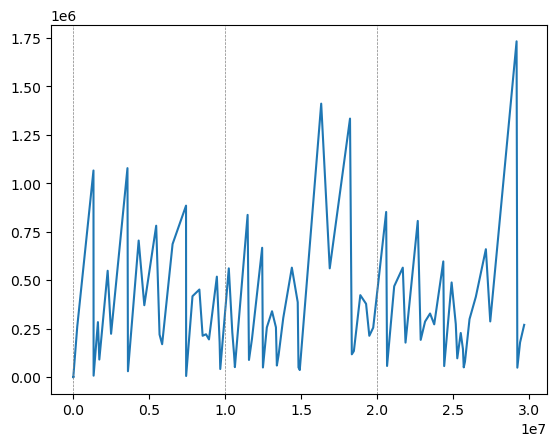

r    5.000000e-08
S    2.000000e+02
Name: 1, dtype: float64


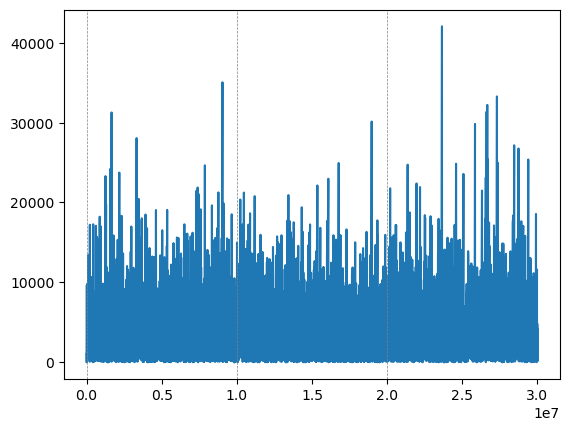

r    5.000000e-08
S    2.000000e+01
Name: 1, dtype: float64


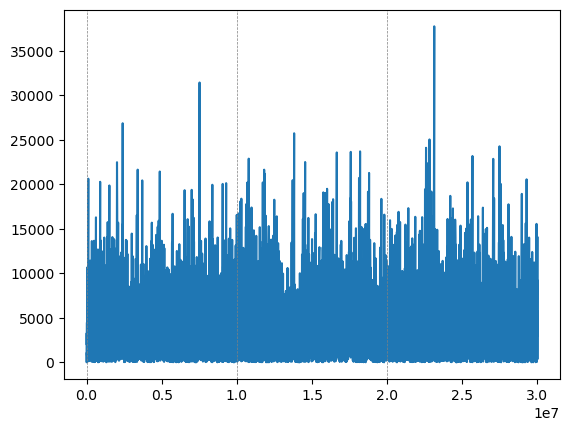

r    5.000000e-10
S    2.000000e+01
Name: 1, dtype: float64


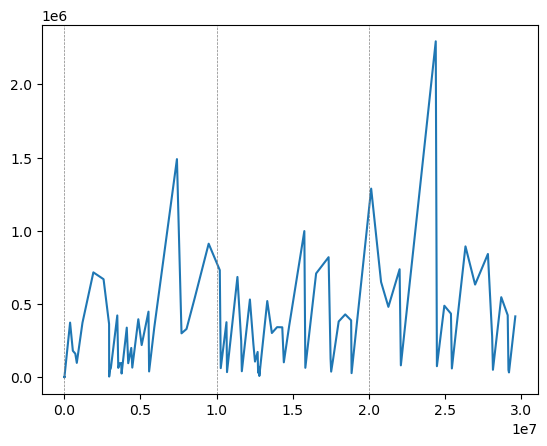

r    5.000000e-08
S    2.000000e+00
Name: 1, dtype: float64


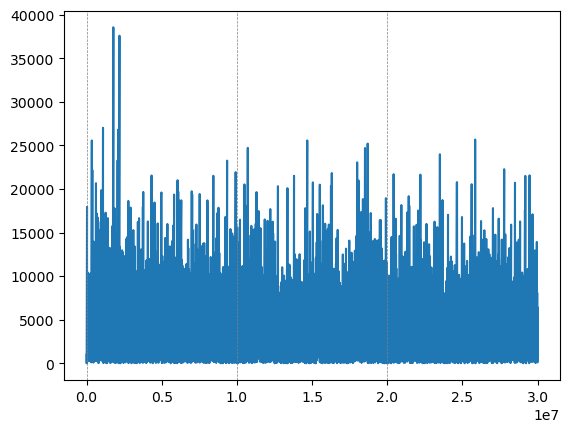

r    5.000000e-10
S    2.000000e+01
Name: 1, dtype: float64


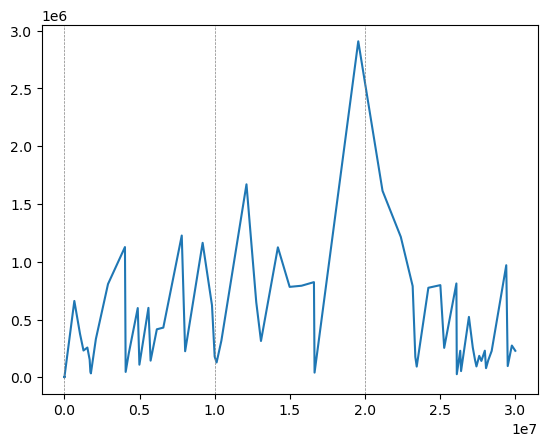

r    5.000000e-10
S    2.000000e+00
Name: 1, dtype: float64


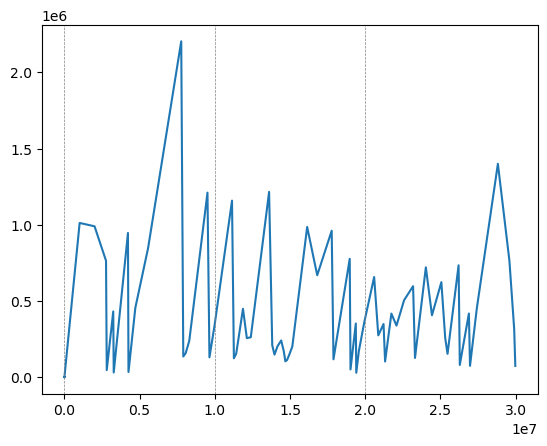

r    5.000000e-10
S    2.000000e+02
Name: 1, dtype: float64


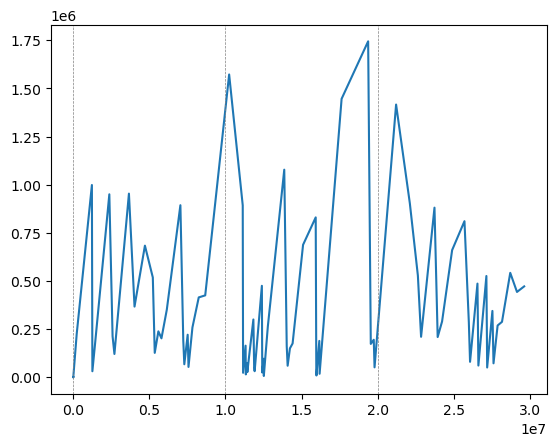

r    5.000000e-10
S    2.000000e+02
Name: 1, dtype: float64


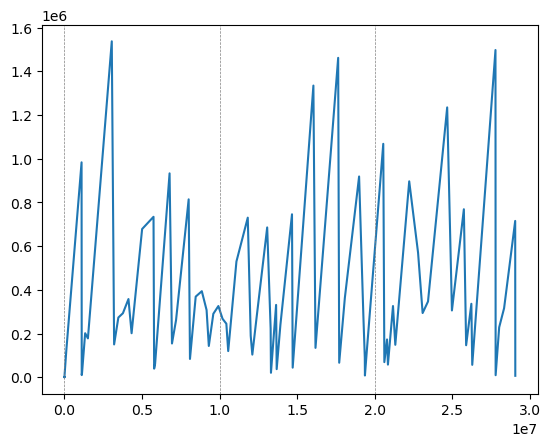

r    5.000000e-10
S    2.000000e+00
Name: 1, dtype: float64


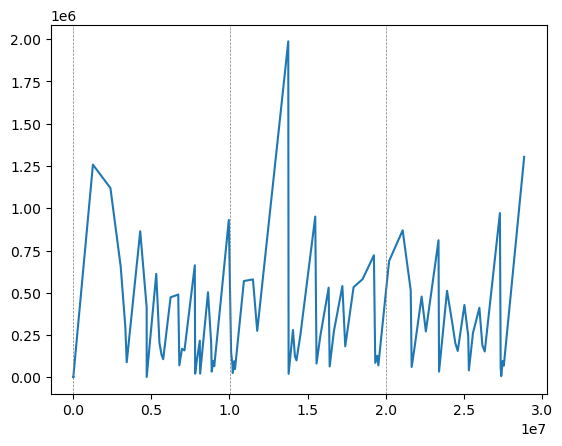

r    5.000000e-10
S    2.000000e+00
Name: 1, dtype: float64


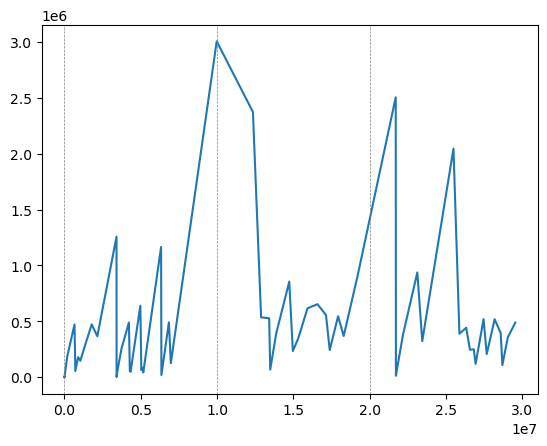

r    5.000000e-10
S    2.000000e+02
Name: 1, dtype: float64


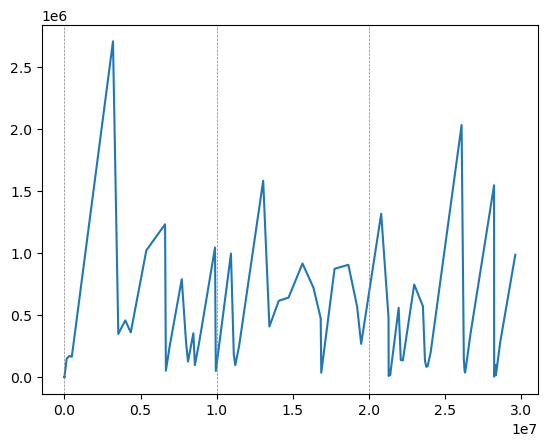

r    5.000000e-10
S    2.000000e+02
Name: 1, dtype: float64


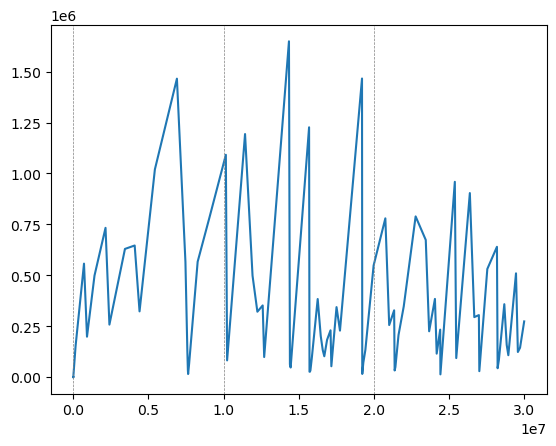

r    5.000000e-10
S    2.000000e+00
Name: 1, dtype: float64


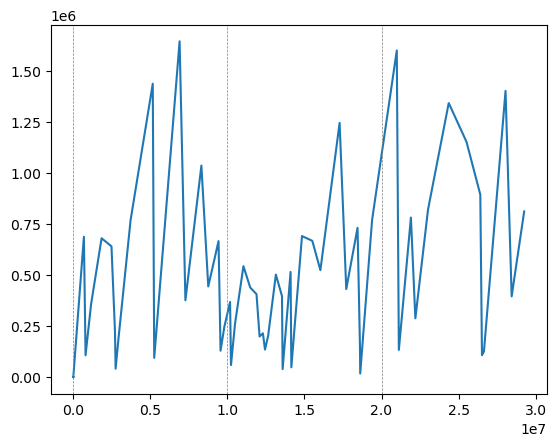

r    5.000000e-10
S    2.000000e+02
Name: 1, dtype: float64


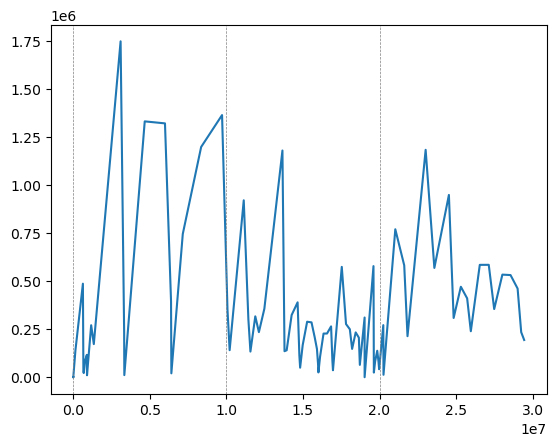

r    5.000000e-10
S    2.000000e+00
Name: 1, dtype: float64


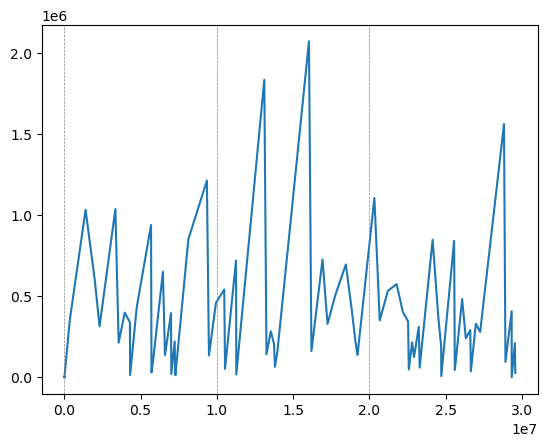

In [18]:
amplicon_intervals = [(2003, 3003), (10003003, 10004003), (20004003, 20005003)] #(start, end) of amplicon genomic position intervals
amplicon_average_positions = [(sum(e) // 2) for e in amplicon_intervals] #average of amplicon positions
dir = "../steps/processed_tree_seqs/"
files = os.listdir(dir)
tables = [f for f in files if f.endswith('.h5')]
dfs = [pd.read_hdf(dir + s) for s in tables]
for df in dfs:
    print(df[['r', 'S']].iloc[0])
    x = np.array(df["Position"][1:])
    #ranges of tree sequence span in the chromosome position
    y = np.array([n - df["Position"].iloc[i - 1] for i, n in enumerate(df["Position"]) if i != 0])
    plt.plot(x, y)
    for vline in amplicon_average_positions:
                    plt.axvline(x = vline, color='grey', linestyle='--', lw = 0.5)
    plt.show()

In [ ]:
g = sns.FacetGrid(merged_df, col="r", row="S", height=6)
g.map(sns., "Position", x, s=1, color = "green")